In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]

In [5]:
def quadratic_function(theta):
    """The cost function, J(theta).
    This is a random quadratic function"""
    return 0.5*(2*theta-1)**2

# Visualizing the quadritc function

Text(0.5, 1.0, 'Simple quadratic function')

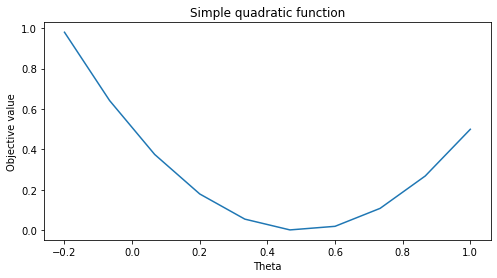

In [6]:
thetas = np.linspace(-0.2,1,10) #generating x axis values
f_vals = quadratic_function(thetas[:,np.newaxis])
plt.plot(thetas,f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

# Derivatives

Text(0.5, 1.0, 'Simple quadratic function')

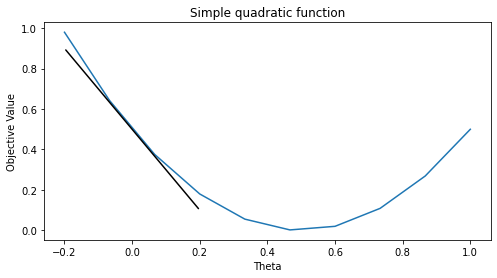

In [7]:
def quadratic_derivative(theta):
    """Derivative of previous function"""
    return (2*theta-1)*2

df0 = quadratic_derivative(np.array([0]))
f0 = quadratic_function(np.array([0]))
line_length = 0.2

plt.plot(thetas, f_vals)
plt.annotate('',xytext = (0-line_length,f0-line_length*df0), xy=(0+line_length,f0+line_length*df0),
arrowprops = {'arrowstyle': '-', 'lw':1.5}, va='center', ha='center')

#arrowprops draw an arrow between xytext and xy! These expressions are just to tell where the initial
#and end of the line is located

plt.xlabel('Theta')
plt.ylabel('Objective Value')
plt.title('Simple quadratic function')

Text(0.5, 1.0, 'Simple quadratic function')

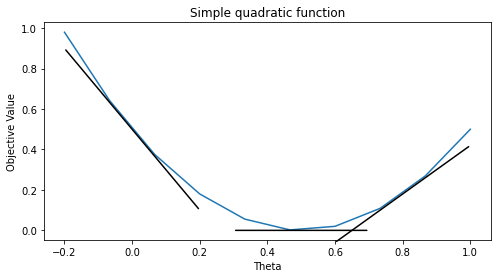

In [8]:
pts = np.array(([0, 0.5, 0.8])).reshape((3,1))
df0s = quadratic_derivative(pts)
f0s = quadratic_function(pts)
line_length = 0.2

plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts.flatten(), f0s.flatten(), df0s.flatten()):
    plt.annotate('',xytext = (pt-line_length,f0-line_length*df0), xy=(pt+line_length,f0+line_length*df0),
arrowprops = {'arrowstyle': '-', 'lw':1.5}, va='center', ha='center')

plt.xlabel('Theta')
plt.ylabel('Objective Value')
plt.title('Simple quadratic function')

# Defining quadratic function

In [9]:
def quadratic_function2d(theta0,theta1):
    """Quadratic objective function, J (theta0, theta1)
    
    Inputs are 2d np arrays, objective function is evaluated at each value of theta0(i,j) and theta1(i,j)
    This make it easier to plot level curves
    Returns: fvals (np.array): 2d array of objective function values  
    """
    
    theta0 = np.atleast_2d(np.asarray(theta0))
    theta1 = np.atleast_2d(np.asarray(theta1))
    return 0.5*((2*theta1-2)**2 + (theta0-3)**2)

(-4.0, 7.0, -1.0, 4.0)

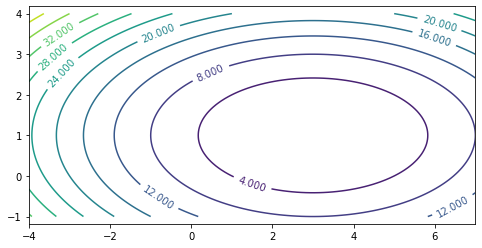

In [10]:
theta0_grid = np.linspace(-4,7,101)
theta1_grid = np.linspace(-1,4,101)
theta_grid = theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis]

J_grid = quadratic_function2d(theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis])

X,y = np.meshgrid(theta0_grid, theta1_grid)
contours = plt.contour(X,y,J_grid,10)
plt.clabel(contours)
plt.axis('equal')

# Defining derivative

In [11]:
def quadratic_derivative2d(theta0,theta1):
    """Derivative of quadratic objective function
    Returns: 2d array of partial derivatives grads is of the same size as theta0 and theta1
    along first dimension and of size two along the second dimension.
    grads[i,j] is the j-th partial derivative at input theta0[i], theta1[i]
    """
    #This is the gradient of 0.5*((2*theta1-2)**2 + (theta0-3)**2)
    
    grads=np.stack([theta0-3,(2*theta1-2)*2],axis=1)
    grads = grads.reshape([len(theta0),2])
    return grads

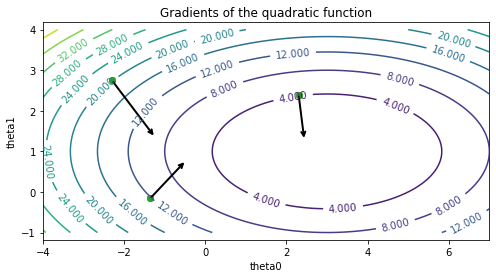

In [12]:
theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4,-0.15, 2.75])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

contours = plt.contour(X,y, J_grid,10)
for theta0_pt, theta1_pt, df0 in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate('',xytext=(theta0_pt,theta1_pt),
                xy=(theta0_pt-line_length*df0[0], theta1_pt-line_length*df0[1]),
                arrowprops={'arrowstyle': '->','lw':2}, va='center', ha='center')
    
    plt.scatter(theta0_pts, theta1_pts)
    plt.clabel(contours)
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('Gradients of the quadratic function')
    plt.axis ('equal')

# Gradient Descent

In [13]:
def gradient_descent(step_size):
    convergence_threshold = 1e-1
    theta, theta_prev = np.array([[-2],[3]]), np.array([[0],[0]])
    opt_pts = [theta.flatten()]
    opt_grads=[]

    while abs(quadratic_function2d(*theta) - quadratic_function2d(*theta_prev))>convergence_threshold:
        #obs: the * while calling the fuction "unpacks" the array to -2 and 3
        theta_prev = theta
        gradient = quadratic_derivative2d(*theta).reshape([2,1])
        theta = theta_prev - step_size*gradient
        opt_pts += [theta.flatten()]
        opt_grads += [gradient.flatten()]
    return opt_pts, opt_grads

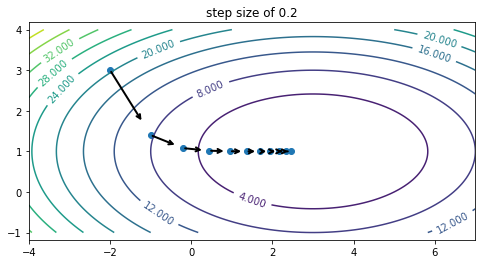

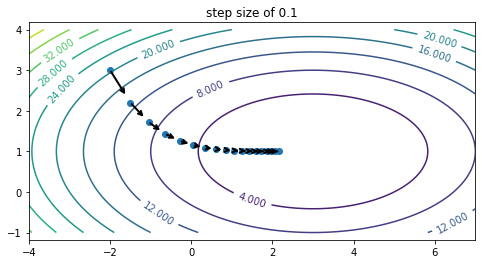

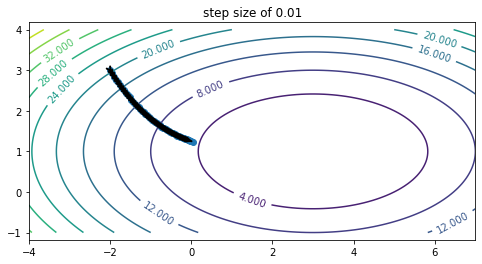

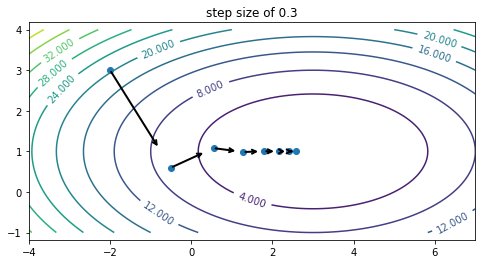

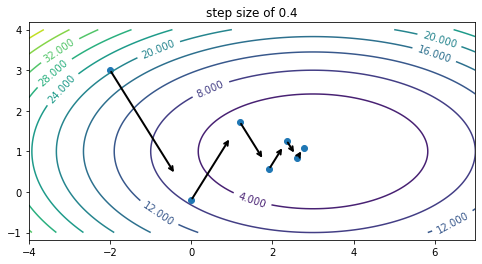

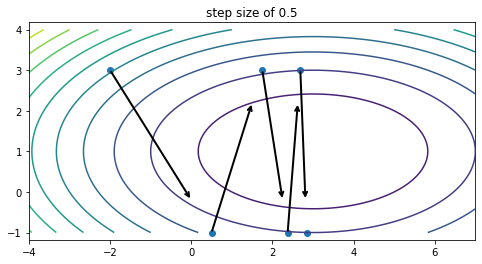

In [16]:
step_size = [2e-1, 1e-1, 1e-2, 3e-1, 4e-1, 5e-1]

for step in step_size:
    
    opt_pts, opt_grads = gradient_descent(step)

    opt_pts = np.array(opt_pts)
    opt_grads = np.array(opt_grads)
    plt.figure()
    plt.clabel(contours)
    plt.title('step size of {}'.format(step))
    plt.scatter(opt_pts[:,0], opt_pts[:,1])
    contours = plt.contour(X,y, J_grid,10)

    for opt_pt, opt_grad in zip(opt_pts, opt_grads):
        plt.annotate('',xytext=(opt_pt[0],opt_pt[1]),
                    xy=(opt_pt[0]-0.8*step*opt_grad[0], opt_pt[1]-0.8*step*opt_grad[1]),
                    arrowprops={'arrowstyle': '->','lw':2}, va='center', ha='center')


        plt.axis ('equal')